In [1]:
# For Loading and Manipulating data
import pandas as pd
import numpy as np

# To display all the columns and the rows ( regardless of their number or their width )
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# For Data Cleaning
from fuzzywuzzy import process
import re

# For visualization purposes
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# To change the style of the plots ( so that we all can see the same thing :) )
plt.style.use('seaborn')

In [2]:
candy = pd.read_csv('candyhierarchy2017.csv', encoding='latin-1')

A Quick Overview on the data before Cleaning.

In [3]:
candy.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we donÕt know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | HersheyÕs Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&MÕs,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | ReeseÕs Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy worth eating.,White and gold,NaN,

> **Comment**
- There is two columns that i don't know what they are about "Unnamed: 113" and "Click Coordinates (x, y)"

In [4]:
candy.shape

(2460, 120)

In [5]:
" " in candy.values     # What i call hidden NaNs

False

In [6]:
candy.duplicated().sum()   # Duplicates

0

In [7]:
100*candy.isnull().mean().sort_values(ascending=False)     # NaNs

Unnamed: 113                                                                              99.634146
Q12: MEDIA [Yahoo]                                                                        97.276423
Q12: MEDIA [Daily Dish]                                                                   96.544715
Q12: MEDIA [ESPN]                                                                         95.975610
Q9: OTHER COMMENTS                                                                        84.308943
Q8: DESPAIR OTHER                                                                         70.853659
Q7: JOY OTHER                                                                             62.967480
Q12: MEDIA [Science]                                                                      44.634146
Q6 | JoyJoy (Mit Iodine!)                                                                 41.707317
Q6 | Maynards                                                                             41.626016


In [8]:
candy['Unnamed: 113'].value_counts()

dress (https://survey.ubc.ca/media/assets/user/14372/storage/dress.png)    9
Name: Unnamed: 113, dtype: int64

> Now i am confident of uselessness of "Unnamed: 113" column 

Also The let's investigate more the columns:
- Q9: OTHER COMMENTS 
- Q8: DESPAIR OTHER
- Q7: JOY OTHER

In [9]:
candy['Q9: OTHER COMMENTS'].value_counts()

nom nom nom!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [10]:
candy['Q8: DESPAIR OTHER'].value_counts()

Trump                                                                                                                                                                                                                                                                                                                                                                                                                                                 7
Almond Joy, Mounds                                                                                                                                                                                                                                                                                                                                                                                                                                    3
Popcorn balls                                                                                                           

In [11]:
candy['Q7: JOY OTHER'].value_counts()

Beer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     10
Almond Joy                                                                                                                                                                                                                                                                                                                                                                                                  

> After applying some nlp methods we can extract some important features from them but unfortunately i don't have time for this :( so simply i will drop them.

## Summary:
- There are 2460 observations and 120 features 
- There are two useless columns:
    - "Unnamed: 113".
    - "Click Coordinates (x, y)"
- Some columns can be valuable but need special treatment:
    - Q9: OTHER COMMENTS 
    - Q8: DESPAIR OTHER
    - Q7: JOY OTHER
- Each Question needs to be investigated (And rearranged if needed) separately before judging on the number of NaNs of the remaining columns.

# Data Cleaning

First of all let's drop the useless columns

In [12]:
candy.drop(columns=['Unnamed: 113', 'Click Coordinates (x, y)', 
                    'Q9: OTHER COMMENTS', 'Q8: DESPAIR OTHER', 'Q7: JOY OTHER'], inplace=True)

Let's also remove the people that didn't respond to any questions

In [13]:
candy.shape

(2460, 115)

In [14]:
candy.dropna(axis=0, how="all", subset=candy.columns[1:], inplace=True)

- Test

In [15]:
# for testing purposes
candy.shape

(2439, 115)

In [16]:
candy.isnull().sum()

Internal ID                                                                                  0
Q1: GOING OUT?                                                                              89
Q2: GENDER                                                                                  20
Q3: AGE                                                                                     63
Q4: COUNTRY                                                                                 43
Q5: STATE, PROVINCE, COUNTY, ETC                                                            79
Q6 | 100 Grand Bar                                                                         726
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)     713
Q6 | Any full-sized candy bar                                                              651
Q6 | Black Jacks                                                                           937
Q6 | Bonkers (the candy)                          

**Q1**

_Exploring phase_

In [17]:
candy['Q1: GOING OUT?'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [18]:
100*candy['Q1: GOING OUT?'].isnull().mean()

3.6490364903649035

> Before deciding to drop the nans or not. Let's see if these people how ignored this questions haave ignored also most of the questions or this question only.

In [19]:
candy_q1_ignored = candy[candy['Q1: GOING OUT?'].isnull()]
candy_q1_ignored.isnull().sum()

Internal ID                                                                                0
Q1: GOING OUT?                                                                            89
Q2: GENDER                                                                                 6
Q3: AGE                                                                                    6
Q4: COUNTRY                                                                                6
Q5: STATE, PROVINCE, COUNTY, ETC                                                           5
Q6 | 100 Grand Bar                                                                        28
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)    31
Q6 | Any full-sized candy bar                                                             26
Q6 | Black Jacks                                                                          34
Q6 | Bonkers (the candy)                                              

> **Observation**
- We can see that about half of the people that don't specify if they go out or not are not patient enough to complete the survey.

> **What i will do**
- I will remove every person who didn't complete the survey ( except for "Q2: GENDER", "Q3: AGE", "Q4: COUNTRY",and "Q5: STATE, PROVINCE, COUNTY, ETC" ).

Let's generalize the removing process and remove every person who didn't complete the survey and respond only to the first 5 short questions.

In [20]:
# for testing purposes
candy.shape

(2439, 115)

In [21]:
candy.dropna(axis=0, how="all", subset=candy.columns[6:], inplace=True)

- Test

In [22]:
candy.shape

(1806, 115)

Now let's look again of the data

In [23]:
candy.isnull().sum()

Internal ID                                                                                  0
Q1: GOING OUT?                                                                              65
Q2: GENDER                                                                                  11
Q3: AGE                                                                                     36
Q4: COUNTRY                                                                                 22
Q5: STATE, PROVINCE, COUNTY, ETC                                                            42
Q6 | 100 Grand Bar                                                                          93
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)      80
Q6 | Any full-sized candy bar                                                               18
Q6 | Black Jacks                                                                           304
Q6 | Bonkers (the candy)                          

_Cleaning Phase_

Let's fill the null values of the first question with **"Unspecified"**

In [24]:
candy['Q1: GOING OUT?'].fillna('Unspecified', inplace=True)

- Test

In [25]:
candy['Q1: GOING OUT?'].isnull().sum()

0

Before leaving this column i want to rename it to "Q1_going_out?"

In [26]:
candy.rename(columns={"Q1: GOING OUT?":"Q1_going_out?"}, inplace=True)

- Test

In [27]:
candy.columns[1]

'Q1_going_out?'

**Q2**

_Exploring Phase_

In [28]:
candy['Q2: GENDER'].unique()

array(['Male', 'Female', "I'd rather not say", 'Other', nan], dtype=object)

In [29]:
candy['Q2: GENDER'].isnull().sum()

11

> As we can see there is an option called "I'd rather not say" so I will replace every NaN with "I'd rather not say"

_Cleaning Phase_

In [30]:
candy['Q2: GENDER'].fillna("I'd rather not say", inplace=True)

- Test

In [31]:
candy['Q2: GENDER'].isnull().sum()

0

Renaming...

In [32]:
candy.rename(columns={"Q2: GENDER":"Q2_gender"}, inplace=True)

- Test

In [33]:
candy.columns[2]

'Q2_gender'

**Q3**

_Exploring Phase_

In [34]:
candy['Q3: AGE'].dtype

dtype('O')

In [35]:
candy['Q3: AGE'].value_counts()

40                                                  66
37                                                  66
43                                                  64
44                                                  62
34                                                  61
45                                                  60
50                                                  59
42                                                  59
35                                                  58
38                                                  57
39                                                  57
36                                                  57
33                                                  53
49                                                  53
48                                                  52
47                                                  49
41                                                  49
53                                                  48
46        

> Let's investigate the people that are not talking the survey seriously, to decide what to do with them.

In [36]:
bad_values = candy['Q3: AGE'].value_counts()[candy['Q3: AGE'].value_counts() < 2].index
temp = candy[candy['Q3: AGE'].isin(bad_values)]

Removing the numbers...

In [37]:
temp = temp[~temp['Q3: AGE'].str.isdigit()]
temp

,Internal ID,Q1_going_out?,Q2_gender,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we donÕt know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | HersheyÕs Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&MÕs,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | ReeseÕs Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q10: DRESS,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
203,90273318,No,Male,Old enough,USA,California,JOY,MEH,JOY,DESPAIR,MEH,MEH,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,MEH,MEH,JOY,JOY,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,JOY,JOY,JOY,MEH,JOY,JOY,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,MEH,JOY,JOY,MEH,JOY,MEH,JOY,DESPAIR,JOY,JOY,MEH,JOY,DESPAIR,JOY,JOY,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,JOY,JOY,DESPAIR,JOY,MEH,MEH,JOY,MEH,DESPAIR,JOY,Blue and black,Friday,1.0,NaN,NaN,NaN
247,90273429,No,Male,Many,USA,California,MEH,DESPAIR,JOY,JOY,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,MEH,MEH,DESPAIR,JOY,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,JOY,JOY,MEH,JOY,JOY,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,DESPAIR,MEH,JOY,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
325,90273639,No,Male,?,Canada,British Columbia,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY

The one in the index 1551 seems to be serious, so I will edit his age value

In [38]:
candy.loc[1551, 'Q3: AGE']

'46 Halloweens.'

In [39]:
candy.loc[1551, 'Q3: AGE'] = '46'

- Test

In [40]:
candy.loc[1551, 'Q3: AGE']

'46'

In [41]:
temp.drop(index=[1551], inplace=True)

We can not take answers from people like them ( their anwers will not be reliable )

In [42]:
to_drop = temp.index
candy.drop(index=to_drop, inplace=True)

In [43]:
candy['Q3: AGE'] = pd.to_numeric(candy['Q3: AGE'], errors='coerce')

In [44]:
candy['Q3: AGE'].isnull().sum()

36

> Let's investigate them a little bit

In [45]:
candy[candy['Q3: AGE'].isnull()]

,Internal ID,Q1_going_out?,Q2_gender,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we donÕt know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | HersheyÕs Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&MÕs,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | ReeseÕs Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q10: DRESS,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
5,90272852,No,Male,NaN,NaN,NaN,JOY,DESPAIR,JOY,NaN,NaN,NaN,MEH,MEH,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,JOY,JOY,MEH,MEH,JOY,DESPAIR,MEH,MEH,JOY,NaN,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,MEH,JOY,JOY,MEH,MEH,MEH,MEH,MEH,NaN,JOY,NaN,DESPAIR,NaN,JOY,MEH,MEH,MEH,MEH,JOY,MEH,JOY,NaN,JOY,JOY,JOY,JOY,JOY,JOY,JOY,NaN,NaN,NaN,JOY,JOY,JOY,JOY,MEH,JOY,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,MEH,MEH,NaN,NaN,MEH,DESPAIR,JOY,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,NaN,NaN,NaN,1.0,NaN,NaN
350,90273699,No,Female,NaN,NaN,NaN,JOY,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,JOY,MEH,DESPAIR,JOY,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,MEH,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,MEH,JOY,MEH,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,MEH,JOY,DESPAIR,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,JOY,MEH,MEH,MEH,MEH,JOY,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,MEH,DESPAIR,JOY,MEH,MEH,JOY,DESPAIR,JOY,MEH,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,Blue and black,Sunday,NaN,1.0,NaN,NaN
352,90273703,No,I'd rather not say,NaN,NaN,NaN,JOY,MEH,JOY,JOY,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,JOY,MEH,MEH,MEH,JOY,DESPAIR,MEH,JOY,JOY,MEH,MEH,MEH,JOY,MEH,MEH,JOY,MEH,JOY,JOY

> I think they are not so bad and can contain useful info so i will fill them

_Cleaning Phase_

Now is the question, should i fill it with mean of median ?. so answer this question let's investigate the outliers.

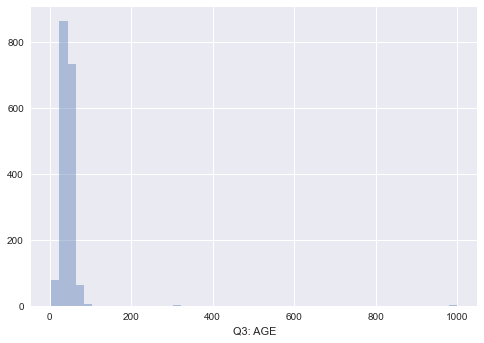

In [46]:
sns.distplot(candy['Q3: AGE'], kde=False);

> As we can see, I forgot to drop large ages

I will make the threshold of age is 90

In [47]:
candy = candy[candy['Q3: AGE'] <= 90]

Let's visualize again

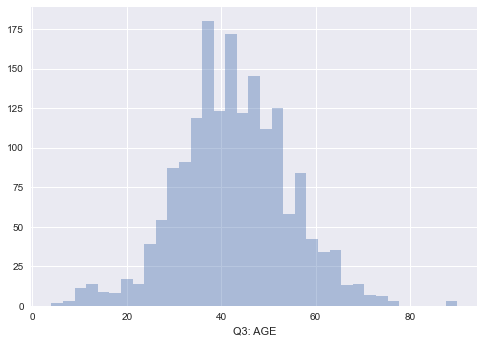

In [48]:
sns.distplot(candy['Q3: AGE'], kde=False);

> As we can see there is only one or two outliers. I think they will not make a big difference between the mean and the median but i prefer to use the median in filling the NaNs in this case.

Check...

In [49]:
candy['Q3: AGE'].mean(), candy['Q3: AGE'].median()

(42.670103092783506, 42.0)

> As we can see no big difference

In [50]:
candy['Q3: AGE'].fillna(candy['Q3: AGE'].median(), inplace=True)

- Test

In [51]:
candy['Q3: AGE'].isnull().sum()

0

Renaming...

In [52]:
candy.rename(columns={'Q3: AGE':'Q3_age'}, inplace=True)

- Test

In [53]:
candy.columns[3]

'Q3_age'

**Q4**

_Exploring Phase_

In [54]:
candy['Q4: COUNTRY'].value_counts()

USA                                                                     530
United States                                                           383
usa                                                                     155
Canada                                                                  120
US                                                                       95
Usa                                                                      85
USA                                                                      54
United States of America                                                 45
united states                                                            30
United States                                                            26
canada                                                                   26
us                                                                       24
United states                                                            15
Us          

> As we can see there is many values that refers to the same thing, i will solve this issue using string similarity.

> Also here there is some bad values:
- I don't know anymore ( drop it )
- Trumpistan ( replace it to USA )
- I pretend to be from Canada, but I am really from the United States ( replace it to USA ).
- Earth ( drop it )
- endland ( replace it to UK )
- Canae ( replace it to Turkey )
- Narnia ( drop it )
- New York ( replace it to USA )
- California ( replace it to USA )
- Europe ( drop it )
- Can ( i think it's Canada )
- England ( replace it to UK )

_Cleaning Phase_

Let's replace or drop the bad values first

In [55]:
candy['Q4: COUNTRY'] = candy['Q4: COUNTRY'].replace({'Trumpistan':'USA', 'Canae':'Turkey', 'New York':'USA', 'endland':'UK',
                                                    'California':'USA', 'Can':'Canada', 'England':'UK', 'America':'USA',
                                                    'I pretend to be from Canada, but I am really from the United States.':'USA'
                                                    , 'United kingdom':'UK', 'america':'USA', 'N. America': 'USA'})

In [56]:
bad_values = ["I don't know anymore", "Earth", "endland", "Narnia", "Europe"]
candy = candy[~candy['Q4: COUNTRY'].isin(bad_values)]

In [57]:
countries = ['USA', 'Canada', 'UK', 'Korea', 'France', 'Murrika', 'Germany']   # repeated countries
 
# Let's investigate one of them to select the best threshold
matches = process.extract('USA', candy['Q4: COUNTRY'], limit = candy.shape[0])
matches

[('USA ', 100, 1),
 ('usa', 100, 4),
 ('USA', 100, 15),
 ('USA', 100, 16),
 ('USA', 100, 27),
 ('USA', 100, 29),
 ('USA', 100, 31),
 ('USA', 100, 32),
 ('Usa', 100, 33),
 ('USA', 100, 34),
 ('usa', 100, 45),
 ('USA', 100, 46),
 ('USA', 100, 56),
 ('usa', 100, 57),
 ('USA', 100, 60),
 ('USA ', 100, 63),
 ('USA', 100, 64),
 ('USA', 100, 65),
 ('USA', 100, 68),
 ('USA', 100, 69),
 ('USA', 100, 70),
 ('USA', 100, 71),
 ('USA', 100, 74),
 ('USA', 100, 81),
 ('USA', 100, 82),
 ('Usa', 100, 83),
 ('USA', 100, 93),
 ('USA', 100, 94),
 ('Usa', 100, 97),
 ('USA', 100, 98),
 ('USA', 100, 104),
 ('USA', 100, 107),
 ('USA ', 100, 108),
 ('USA', 100, 111),
 ('usa', 100, 112),
 ('Usa', 100, 113),
 ('USA', 100, 116),
 ('USA ', 100, 126),
 ('USA', 100, 128),
 ('USA', 100, 131),
 ('USA', 100, 134),
 ('USA', 100, 140),
 ('USA', 100, 141),
 ('USA', 100, 142),
 ('USA', 100, 148),
 ('Usa', 100, 157),
 ('USA', 100, 159),
 ('USA ', 100, 161),
 ('USA', 100, 164),
 ('USA', 100, 168),
 ('USA ', 100, 170),
 ('USA

> I think 60 is a good threshold

In [58]:
for country in countries:
    # Finding potential matches
    matches = process.extract(country, candy['Q4: COUNTRY'], limit = candy.shape[0])
    # For each potential match match
    for potential_match in matches:
        # If high similarity score
        if potential_match[1] >= 60:
            # Replace typo with correct category
            candy.loc[candy['Q4: COUNTRY'] == potential_match[0], 'Q4: COUNTRY'] = country

- Test

In [59]:
candy['Q4: COUNTRY'].value_counts()

USA                             1460
Canada                           158
United States of America          45
UK                                14
United States of America           8
Germany                            7
United Kingdom                     6
united states of america           4
Netherlands                        4
Korea                              3
France                             3
Ireland                            3
Japan                              3
Murrika                            3
Scotland                           3
Mexico                             2
Denmark                            2
Switzerland                        2
South africa                       1
New Jersey                         1
China                              1
United Statea                      1
Greece                             1
Taiwan                             1
North Carolina                     1
Turkey                             1
Pittsburgh                         1
C

Last move....

In [60]:
candy['Q4: COUNTRY'] = candy['Q4: COUNTRY'].replace({'United Kingdom':'UK', 'The United States of America':'USA', 
                                                     'United States of America ':'USA', 'United States of America':'USA',
                                                     'united states of america':'USA'})

- Test

In [61]:
candy['Q4: COUNTRY'].value_counts()

USA                1518
Canada              158
UK                   20
Germany               7
Netherlands           4
Korea                 3
Murrika               3
Japan                 3
France                3
Ireland               3
Scotland              3
Denmark               2
Mexico                2
Switzerland           2
Turkey                1
North Carolina        1
Taiwan                1
Greece                1
Pittsburgh            1
China                 1
New Jersey            1
South africa          1
Costa Rica            1
United Statea         1
Name: Q4: COUNTRY, dtype: int64

> Finally :)

NaNs...

In [62]:
candy['Q4: COUNTRY'].isnull().sum()

1

let's explore it

In [63]:
candy[candy['Q4: COUNTRY'].isnull()]

,Internal ID,Q1_going_out?,Q2_gender,Q3_age,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we donÕt know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | HersheyÕs Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&MÕs,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | ReeseÕs Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q10: DRESS,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
1409,90279081,Yes,Female,43.0,NaN,Arizona,JOY,MEH,JOY,MEH,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,JOY,JOY,MEH,DESPAIR,JOY,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,MEH,JOY,MEH,MEH,MEH,MEH,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,JOY,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,JOY,MEH,DESPAIR,MEH,DESPAIR,MEH,JOY,DESPAIR,MEH,JOY,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,MEH,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,MEH,White and gold,Friday,NaN,1.0,NaN,NaN


> As we can see the state is Arizona so the country should be USA

In [64]:
candy.loc[1409, 'Q4: COUNTRY'] = 'USA'

- Test

In [65]:
candy['Q4: COUNTRY'].isnull().sum()

0

Renaming....

In [66]:
candy.rename(columns={'Q4: COUNTRY':'Q4_country'}, inplace=True)

In [67]:
candy.columns[4]

'Q4_country'

**Q4**

_Exploring Phase_

In [68]:
candy.columns[5]

'Q5: STATE, PROVINCE, COUNTY, ETC'

In [69]:
candy['Q5: STATE, PROVINCE, COUNTY, ETC'].value_counts()

California                                          106
CA                                                   65
Texas                                                44
Illinois                                             41
Oregon                                               38
Ontario                                              36
New York                                             32
WA                                                   29
Ohio                                                 27
Washington                                           27
NY                                                   24
Virginia                                             22
Alberta                                              22
BC                                                   20
Massachusetts                                        20
Pennsylvania                                         20
California                                           19
Michigan                                        

> As i don't have a list of the unique values that should be in this column And there is no time to create it manually as i did in Q4 column, I will drop this column and Q4 column is enough for me.

In [70]:
candy.drop(columns=['Q5: STATE, PROVINCE, COUNTY, ETC'], inplace=True)

**Q6**

_Exploring Phase_

In [71]:
candy.columns

Index(['Internal ID', 'Q1_going_out?', 'Q2_gender', 'Q3_age', 'Q4_country',
       'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       'Q6 | Bonkers (the candy)',
       ...
       'Q6 | Whatchamacallit Bars', 'Q6 | White Bread',
       'Q6 | Whole Wheat anything', 'Q6 | York Peppermint Patties',
       'Q10: DRESS', 'Q11: DAY', 'Q12: MEDIA [Daily Dish]',
       'Q12: MEDIA [Science]', 'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]'],
      dtype='object', length=114)

In [72]:
q6_cols = [col for col in candy.columns if 'Q6' in col]

In [73]:
Q6 = candy.loc[:, q6_cols].copy()
Q6.head()

,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we donÕt know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | HersheyÕs Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&MÕs,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | ReeseÕs Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties
1,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
3,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR
4,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,M

In [74]:
Q6.shape

(1742, 103)

In [75]:
Q6.isnull().sum()

Q6 | 100 Grand Bar                                                                         89
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)     74
Q6 | Any full-sized candy bar                                                              14
Q6 | Black Jacks                                                                          290
Q6 | Bonkers (the candy)                                                                  320
Q6 | Bonkers (the board game)                                                             334
Q6 | Bottle Caps                                                                          101
Q6 | Box'o'Raisins                                                                         28
Q6 | Broken glow stick                                                                     46
Q6 | Butterfinger                                                                          25
Q6 | Cadbury Creme Eggs                                     

> Simply we will fill them with **"Unspecified"** Value

_Cleaning Phase_

In [76]:
candy[q6_cols] = candy[q6_cols].fillna("Unspecified")

- Test

In [77]:
candy.isnull().sum()

Internal ID                                                                                  0
Q1_going_out?                                                                                0
Q2_gender                                                                                    0
Q3_age                                                                                       0
Q4_country                                                                                   0
Q6 | 100 Grand Bar                                                                           0
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)       0
Q6 | Any full-sized candy bar                                                                0
Q6 | Black Jacks                                                                             0
Q6 | Bonkers (the candy)                                                                     0
Q6 | Bonkers (the board game)                     

Renaming...

In [78]:
q6_edited = [re.sub('\s+', '_', re.sub('[|]', '', col)).capitalize() for col in q6_cols]  
candy.columns = list(candy.columns[:5]) + q6_edited + list(candy.columns[108:]) 

- Test

In [79]:
candy.head()

,Internal ID,Q1_going_out?,Q2_gender,Q3_age,Q4_country,Q6_100_grand_bar,Q6_anonymous_brown_globs_that_come_in_black_and_orange_wrappers_(a.k.a._mary_janes),Q6_any_full-sized_candy_bar,Q6_black_jacks,Q6_bonkers_(the_candy),Q6_bonkers_(the_board_game),Q6_bottle_caps,Q6_box'o'raisins,Q6_broken_glow_stick,Q6_butterfinger,Q6_cadbury_creme_eggs,Q6_candy_corn,Q6_candy_that_is_clearly_just_the_stuff_given_out_for_free_at_restaurants,Q6_caramellos,"Q6_cash,_or_other_forms_of_legal_tender",Q6_chardonnay,Q6_chick-o-sticks_(we_donõt_know_what_that_is),Q6_chiclets,Q6_coffee_crisp,Q6_creepy_religious_comics/chick_tracts,Q6_dental_paraphenalia,Q6_dots,Q6_dove_bars,Q6_fuzzy_peaches,Q6_generic_brand_acetaminophen,Q6_glow_sticks,Q6_goo_goo_clusters,Q6_good_n'_plenty,Q6_gum_from_baseball_cards,Q6_gummy_bears_straight_up,Q6_hard_candy,Q6_healthy_fruit,Q6_heath_bar,Q6_hershey's_dark_chocolate,Q6_hersheyõs_milk_chocolate,Q6_hershey's_kisses,Q6_hugs_(actual_physical_hugs),Q6_jolly_rancher_(bad_flavor),Q6_jolly_ranchers_(good_flavor),Q6_joyjoy_(mit_iodine!),Q6_junior_mints,Q6_senior_mints,Q6_kale_smoothie,Q6_kinder_happy_hippo,Q6_kit_kat,Q6_laffytaffy,Q6_lemonheads,Q6_licorice_(not_black),Q6_licorice_(yes_black),Q6_lindt_truffle,Q6_lollipops,Q6_mars,Q6_maynards,Q6_mike_and_ike,Q6_milk_duds,Q6_milky_way,Q6_regular_m&ms,Q6_peanut_m&mõs,Q6_blue_m&m's,Q6_red_m&m's,Q6_green_party_m&m's,Q6_independent_m&m's,Q6_abstained_from_m&m'ing.,Q6_minibags_of_chips,Q6_mint_kisses,Q6_mint_juleps,Q6_mr._goodbar,Q6_necco_wafers,Q6_nerds,Q6_nestle_crunch,Q6_now'n'laters,Q6_peeps,Q6_pencils,Q6_pixy_stix,Q6_real_housewives_of_orange_county_season_9_blue-ray,Q6_reeseõs_peanut_butter_cups,Q6_reese's_pieces,Q6_reggie_jackson_bar,Q6_rolos,Q6_sandwich-sized_bags_filled_with_booberry_crunch,Q6_skittles,Q6_smarties_(american),Q6_smarties_(commonwealth),Q6_snickers,Q6_sourpatch_kids_(i.e._abominations_of_nature),Q6_spotted_dick,Q6_starburst,Q6_sweet_tarts,Q6_swedish_fish,Q6_sweetums_(a_friend_to_diabetes),Q6_take_5,Q6_tic_tacs,Q6_those_odd_marshmallow_circus_peanut_things,Q6_three_musketeers,Q6_tolberone_something_or_other,Q6_trail_mix,Q6_twix,"Q6_vials_of_pure_high_fructose_corn_syrup,_for_main-lining_into_your_vein",Q6_vicodin,Q6_whatchamacallit_bars,Q6_white_bread,Q6_whole_wheat_anything,Q6_york_peppermint_patties,Q10: DRESS,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
1,90272821,No,Male,44.0,USA,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
3,90272840,No,Male,40.0,USA,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
4,90272841,No,Male,23.0,USA,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,JOY,MEH,JO

**Q10**

_Exploring Phase_

In [80]:
candy['Q10: DRESS'].unique()

array(['White and gold', 'Blue and black', nan], dtype=object)

In [81]:
candy['Q10: DRESS'].value_counts()

White and gold    1045
Blue and black     613
Name: Q10: DRESS, dtype: int64

> Here i think it's more convenient to fill with the mode

_Cleaning Phase_

In [82]:
candy['Q10: DRESS'].fillna(candy['Q10: DRESS'].mode()[0], inplace=True)

- Test

In [83]:
candy['Q10: DRESS'].isnull().sum()

0

Renaming...

In [84]:
candy.rename(columns={'Q10: DRESS':'Q10_dress'}, inplace=True)

- Test

In [85]:
candy.columns[-6]

'Q10_dress'

**Q11**

_Exploring Phase_

In [86]:
candy['Q11: DAY'].unique()

array(['Sunday', 'Friday', nan], dtype=object)

In [87]:
candy['Q11: DAY'].value_counts()

Friday    1056
Sunday     621
Name: Q11: DAY, dtype: int64

> Also here mode is good.

Cleaning Phase

In [88]:
candy['Q11: DAY'].fillna(candy['Q11: DAY'].mode()[0], inplace=True)

- Test

In [89]:
candy['Q11: DAY'].isnull().sum()

0

Renaming...

In [90]:
candy.rename(columns={'Q11: DAY':'Q11_day'}, inplace=True)

- Test

In [91]:
candy.columns[-5]

'Q11_day'

**Q12**

_Exploring Phase_

In [92]:
q12_cols = [col for col in candy.columns if 'Q12' in col]

Q12 = candy.loc[:, q12_cols].copy()
Q12.tail()

,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
2454,NaN,1.0,NaN,NaN
2455,NaN,NaN,NaN,NaN
2456,NaN,1.0,NaN,NaN
2457,NaN,1.0,NaN,NaN
2459,1.0,NaN,NaN,NaN


> As we can see, the cleaning process should pass through two steps:
- First we will convert the four columns into one only one column "q12_media"
- Then we will investigate the null values

In [93]:
# to give each column a unique number
Q12['Q12: MEDIA [Daily Dish]'] = Q12['Q12: MEDIA [Daily Dish]'] * 1
Q12['Q12: MEDIA [Science]']    = Q12['Q12: MEDIA [Science]']    * 2
Q12['Q12: MEDIA [ESPN]']       = Q12['Q12: MEDIA [ESPN]']       * 3
Q12['Q12: MEDIA [Yahoo]']      = Q12['Q12: MEDIA [Yahoo]']      * 4

# Now let's combine them all in one column
candy['Q12_media']             =  Q12.sum(axis=1)

# Now let's replace {1:'Daily Dish', 2:'Science', 3:'ESPN', 4:'Yahoo'}
candy['Q12_media'].replace({1:'Daily Dish', 2:'Science', 3:'ESPN', 4:'Yahoo', 0:'No Selection'}, inplace=True)

candy.drop(columns=q12_cols, inplace=True)

In [94]:
candy.tail()

,Internal ID,Q1_going_out?,Q2_gender,Q3_age,Q4_country,Q6_100_grand_bar,Q6_anonymous_brown_globs_that_come_in_black_and_orange_wrappers_(a.k.a._mary_janes),Q6_any_full-sized_candy_bar,Q6_black_jacks,Q6_bonkers_(the_candy),Q6_bonkers_(the_board_game),Q6_bottle_caps,Q6_box'o'raisins,Q6_broken_glow_stick,Q6_butterfinger,Q6_cadbury_creme_eggs,Q6_candy_corn,Q6_candy_that_is_clearly_just_the_stuff_given_out_for_free_at_restaurants,Q6_caramellos,"Q6_cash,_or_other_forms_of_legal_tender",Q6_chardonnay,Q6_chick-o-sticks_(we_donõt_know_what_that_is),Q6_chiclets,Q6_coffee_crisp,Q6_creepy_religious_comics/chick_tracts,Q6_dental_paraphenalia,Q6_dots,Q6_dove_bars,Q6_fuzzy_peaches,Q6_generic_brand_acetaminophen,Q6_glow_sticks,Q6_goo_goo_clusters,Q6_good_n'_plenty,Q6_gum_from_baseball_cards,Q6_gummy_bears_straight_up,Q6_hard_candy,Q6_healthy_fruit,Q6_heath_bar,Q6_hershey's_dark_chocolate,Q6_hersheyõs_milk_chocolate,Q6_hershey's_kisses,Q6_hugs_(actual_physical_hugs),Q6_jolly_rancher_(bad_flavor),Q6_jolly_ranchers_(good_flavor),Q6_joyjoy_(mit_iodine!),Q6_junior_mints,Q6_senior_mints,Q6_kale_smoothie,Q6_kinder_happy_hippo,Q6_kit_kat,Q6_laffytaffy,Q6_lemonheads,Q6_licorice_(not_black),Q6_licorice_(yes_black),Q6_lindt_truffle,Q6_lollipops,Q6_mars,Q6_maynards,Q6_mike_and_ike,Q6_milk_duds,Q6_milky_way,Q6_regular_m&ms,Q6_peanut_m&mõs,Q6_blue_m&m's,Q6_red_m&m's,Q6_green_party_m&m's,Q6_independent_m&m's,Q6_abstained_from_m&m'ing.,Q6_minibags_of_chips,Q6_mint_kisses,Q6_mint_juleps,Q6_mr._goodbar,Q6_necco_wafers,Q6_nerds,Q6_nestle_crunch,Q6_now'n'laters,Q6_peeps,Q6_pencils,Q6_pixy_stix,Q6_real_housewives_of_orange_county_season_9_blue-ray,Q6_reeseõs_peanut_butter_cups,Q6_reese's_pieces,Q6_reggie_jackson_bar,Q6_rolos,Q6_sandwich-sized_bags_filled_with_booberry_crunch,Q6_skittles,Q6_smarties_(american),Q6_smarties_(commonwealth),Q6_snickers,Q6_sourpatch_kids_(i.e._abominations_of_nature),Q6_spotted_dick,Q6_starburst,Q6_sweet_tarts,Q6_swedish_fish,Q6_sweetums_(a_friend_to_diabetes),Q6_take_5,Q6_tic_tacs,Q6_those_odd_marshmallow_circus_peanut_things,Q6_three_musketeers,Q6_tolberone_something_or_other,Q6_trail_mix,Q6_twix,"Q6_vials_of_pure_high_fructose_corn_syrup,_for_main-lining_into_your_vein",Q6_vicodin,Q6_whatchamacallit_bars,Q6_white_bread,Q6_whole_wheat_anything,Q6_york_peppermint_patties,Q10_dress,Q11_day,Q12_media
2454,90314022,No,Female,26.0,USA,JOY,MEH,JOY,DESPAIR,MEH,MEH,MEH,MEH,DESPAIR,JOY,JOY,JOY,MEH,JOY,JOY,JOY,MEH,MEH,JOY,DESPAIR,DESPAIR,MEH,JOY,JOY,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,JOY,JOY,JOY,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,JOY,JOY,DESPAIR,MEH,JOY,JOY,JOY,MEH,JOY,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,JOY,JOY,JOY,JOY,MEH,JOY,JOY,MEH,JOY,MEH,MEH,DESPAIR,JOY,JOY,MEH,JOY,JOY,JOY,MEH,MEH,JOY,JOY,MEH,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,JOY,JOY,JOY,JOY,MEH,MEH,JOY,MEH,MEH,JOY,White and gold,Friday,Science
2455,90314359,No,Male,24.0,USA,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,JOY,MEH,JOY,JOY,DESPAIR,MEH,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,MEH,DESPAIR,JOY,MEH,MEH,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,JOY,MEH,MEH,JOY,DESPAIR,JOY,DESPAIR,MEH,MEH,MEH,JOY,JOY,MEH,JOY,JOY,MEH,JOY,JOY,MEH,MEH,JOY,JOY,JOY,MEH,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY,MEH,JOY,JOY,JOY,JOY,JOY,MEH,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,MEH,JOY,DESPAIR,MEH,JOY,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,DESPAIR,MEH,DESPAIR,MEH,White and gold,Friday,No Selection
2456,90314580,No,Female,33.0,USA,MEH,DESPAIR,JOY,Unspecified,Unspecified,Unspecified,Unspecified,DESPAIR,DESPAIR,JOY,JOY,JOY,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,Unspecified,DESPAIR,DESPAIR,DESPAIR,MEH,Unspecified,MEH,DESPAIR,Unspecified,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,DESPAIR,MEH,JOY,Unspecified,JOY,Unspecified,DESPAIR,Unspecified,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,Unspecified,Unspecified,DESPAIR,MEH,MEH,JOY,JOY,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,MEH,JOY,Unspecified,JOY,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,JOY,Un

- Last Test

In [95]:
candy.isnull().sum()

Internal ID                                                                            0
Q1_going_out?                                                                          0
Q2_gender                                                                              0
Q3_age                                                                                 0
Q4_country                                                                             0
Q6_100_grand_bar                                                                       0
Q6_anonymous_brown_globs_that_come_in_black_and_orange_wrappers_(a.k.a._mary_janes)    0
Q6_any_full-sized_candy_bar                                                            0
Q6_black_jacks                                                                         0
Q6_bonkers_(the_candy)                                                                 0
Q6_bonkers_(the_board_game)                                                            0
Q6_bottle_caps       

> Done :)

In [96]:
# Let's rename the id columns first
candy.rename(columns={'Internal ID':'Internal_ID'}, inplace=True)

In [97]:
# now it's time to save our new cleaned data 
candy.to_csv('clean_candy.csv', index=False)

<font color='green'>
<h1><center> Now It's time for some exploration </center></h1>

In [2]:
candy = pd.read_csv('clean_candy.csv')

In [3]:
candy.head()

,Internal_ID,Q1_going_out?,Q2_gender,Q3_age,Q4_country,Q6_100_grand_bar,Q6_anonymous_brown_globs_that_come_in_black_and_orange_wrappers_(a.k.a._mary_janes),Q6_any_full-sized_candy_bar,Q6_black_jacks,Q6_bonkers_(the_candy),Q6_bonkers_(the_board_game),Q6_bottle_caps,Q6_box'o'raisins,Q6_broken_glow_stick,Q6_butterfinger,Q6_cadbury_creme_eggs,Q6_candy_corn,Q6_candy_that_is_clearly_just_the_stuff_given_out_for_free_at_restaurants,Q6_caramellos,"Q6_cash,_or_other_forms_of_legal_tender",Q6_chardonnay,Q6_chick-o-sticks_(we_donõt_know_what_that_is),Q6_chiclets,Q6_coffee_crisp,Q6_creepy_religious_comics/chick_tracts,Q6_dental_paraphenalia,Q6_dots,Q6_dove_bars,Q6_fuzzy_peaches,Q6_generic_brand_acetaminophen,Q6_glow_sticks,Q6_goo_goo_clusters,Q6_good_n'_plenty,Q6_gum_from_baseball_cards,Q6_gummy_bears_straight_up,Q6_hard_candy,Q6_healthy_fruit,Q6_heath_bar,Q6_hershey's_dark_chocolate,Q6_hersheyõs_milk_chocolate,Q6_hershey's_kisses,Q6_hugs_(actual_physical_hugs),Q6_jolly_rancher_(bad_flavor),Q6_jolly_ranchers_(good_flavor),Q6_joyjoy_(mit_iodine!),Q6_junior_mints,Q6_senior_mints,Q6_kale_smoothie,Q6_kinder_happy_hippo,Q6_kit_kat,Q6_laffytaffy,Q6_lemonheads,Q6_licorice_(not_black),Q6_licorice_(yes_black),Q6_lindt_truffle,Q6_lollipops,Q6_mars,Q6_maynards,Q6_mike_and_ike,Q6_milk_duds,Q6_milky_way,Q6_regular_m&ms,Q6_peanut_m&mõs,Q6_blue_m&m's,Q6_red_m&m's,Q6_green_party_m&m's,Q6_independent_m&m's,Q6_abstained_from_m&m'ing.,Q6_minibags_of_chips,Q6_mint_kisses,Q6_mint_juleps,Q6_mr._goodbar,Q6_necco_wafers,Q6_nerds,Q6_nestle_crunch,Q6_now'n'laters,Q6_peeps,Q6_pencils,Q6_pixy_stix,Q6_real_housewives_of_orange_county_season_9_blue-ray,Q6_reeseõs_peanut_butter_cups,Q6_reese's_pieces,Q6_reggie_jackson_bar,Q6_rolos,Q6_sandwich-sized_bags_filled_with_booberry_crunch,Q6_skittles,Q6_smarties_(american),Q6_smarties_(commonwealth),Q6_snickers,Q6_sourpatch_kids_(i.e._abominations_of_nature),Q6_spotted_dick,Q6_starburst,Q6_sweet_tarts,Q6_swedish_fish,Q6_sweetums_(a_friend_to_diabetes),Q6_take_5,Q6_tic_tacs,Q6_those_odd_marshmallow_circus_peanut_things,Q6_three_musketeers,Q6_tolberone_something_or_other,Q6_trail_mix,Q6_twix,"Q6_vials_of_pure_high_fructose_corn_syrup,_for_main-lining_into_your_vein",Q6_vicodin,Q6_whatchamacallit_bars,Q6_white_bread,Q6_whole_wheat_anything,Q6_york_peppermint_patties,Q10_dress,Q11_day,Q12_media
0,90272821,No,Male,44.0,USA,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,Science
1,90272840,No,Male,40.0,USA,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,Science
2,90272841,No,Male,23.0,USA,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,JOY,JOY,JOY,JOY,

In [91]:
# Helping Functions
def Histo(data, x, ax=None, kde=False):
    # Main plot
    ax = sns.distplot(data[x], ax=ax, kde=kde, color='blue')
    
    # Adding title
    ax.set_title(f'{x[3:].replace("_", "").capitalize()} distribution', fontsize=20, color='brown')
    
    # Before editing the ticks we need to draw the plot first
    plt.draw()
    
    # Editing axes labels and ticks
    ax.set_xlabel(x[3:].replace('_', '').capitalize(), fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
        
    ax.set_ylabel('Number of People', fontsize=20)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15);
#===========================================================================================================================#   
def CountPlot(data, x, hue=None, ax=None):
    # Main plot
    ax = sns.countplot(data=data, x=x, ax=ax, hue=hue)
    
    # Looping over each column
    for patch in ax.patches:
        loc    = patch.get_x()
        height = patch.get_height()
        width  = patch.get_width()
        
        ax.text(loc+width/2, 1.01*height, str(height), weight='bold', ha="center", fontsize=15)
    
    # Adding title
    ax.set_title(f'{x[3:].replace("_", "").capitalize()} distribution', fontsize=20, color='brown')
    
    # Before editing the ticks we need to draw the plot first
    plt.draw()
    
    # Editing axes labels and ticks
    ax.set_xlabel(x[3:].replace('_', '').capitalize(), fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
        
    ax.set_ylabel('Number of People', fontsize=15)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
    
    
    # Adding legend
    if hue:
        ax.legend(labels=list(data[hue].unique()),  prop={"size":20}, frameon=True, shadow=True);
#===========================================================================================================================#   
def BarPlot(data, x, y, ax=None, hue=None):
    # Main plot
    ax = sns.barplot(data=data, x=x, y=y, hue=hue, ci=None, ax=ax)
    
    # Adding title
    ax.set_title(f'{x} distribution', fontsize=20, color='brown')
    
    # Before editing the ticks we need to draw the plot first
    plt.draw()
    
    # Editing axes labels and ticks
    ax.set_xlabel(x, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
        
    ax.set_ylabel(f'Average {y}', fontsize=20)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15);
    
    # Adding legend
    if hue:
        ax.legend(labels=list(data[hue].unique()),  prop={"size":20}, frameon=True, shadow=True);

<font color='blue'>
<h1><center> Univariate EDA </center></h1>

_Numeric Columns_

## Q1: What is the distribution of Age?

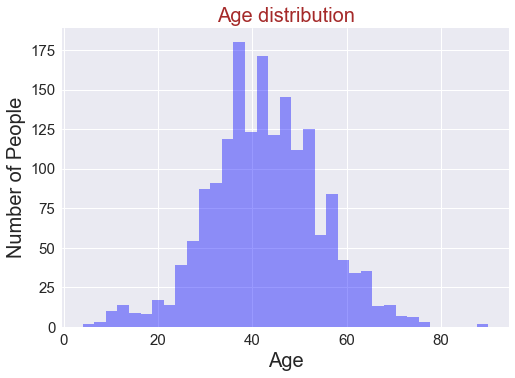

In [5]:
Histo(data=candy, x='Q3_age')

> As we've seen before it's approximately normally distributed.

_CAT columns_

Let's investigate these questions first:
- Q1_going_out?
- Q2_gender
- Q10_dress
- Q11_day
- Q12_media

As Q4 and Q6 needs **special treatment**.

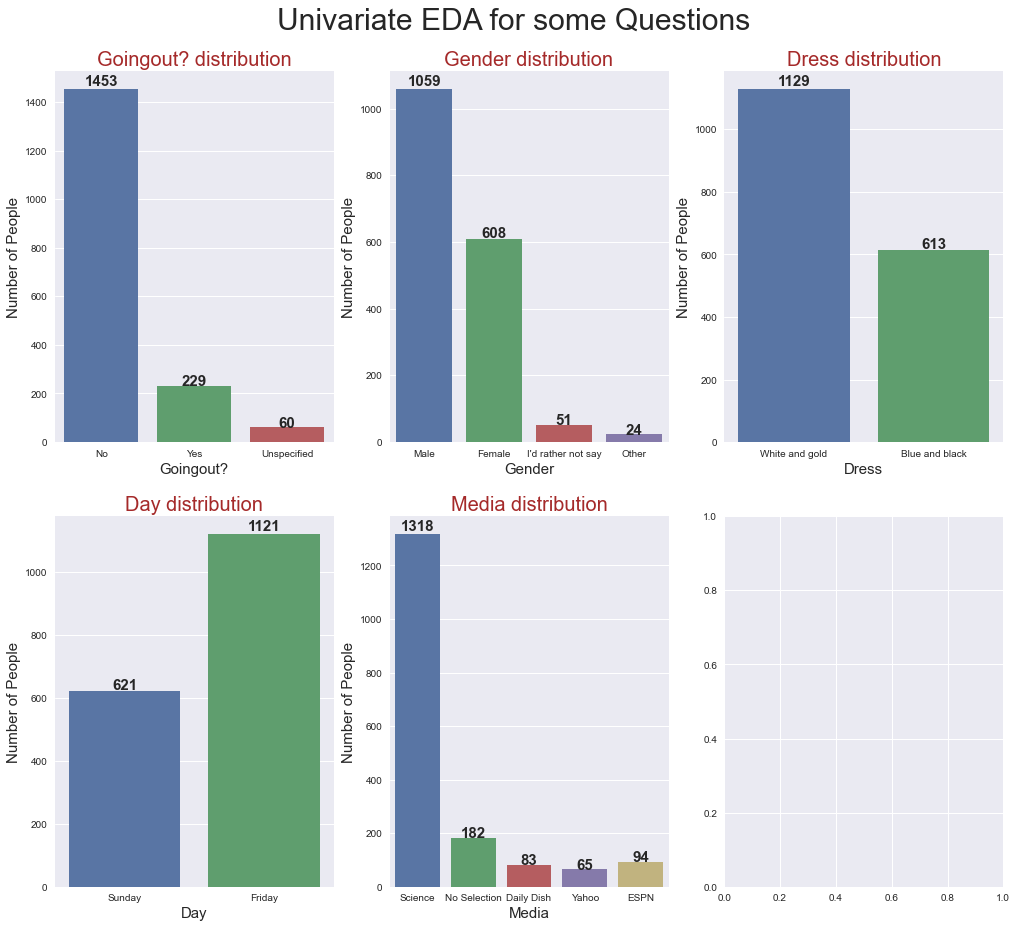

In [6]:
to_inv = ['Q1_going_out?', 'Q2_gender', 'Q10_dress', 'Q11_day', 'Q12_media']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17,15))
fig.suptitle('Univariate EDA for some Questions', fontsize=30, y=0.94)
for i, col in enumerate(to_inv):
    CountPlot(candy, col, ax=axes[i//3,i-(i//3)*3])

> Oooh Interesting, From the above plots we can see the following:
- Most people in 2017 tend not to go out on Halloweens.
- Most people that did this survey were men.
- Most people see the dress in White and Gold at the first sight.
- Most people prefers Friday
- Unexpectedly, the most attractive websites are the scientific ones.

Now let's investigate Q4

In [7]:
candy['Q4_country'].nunique()

24

> relatively high number of unique values 

In [8]:
candy['Q4_country'].value_counts()

USA                1519
Canada              158
UK                   20
Germany               7
Netherlands           4
Scotland              3
Murrika               3
Ireland               3
France                3
Korea                 3
Japan                 3
Switzerland           2
Denmark               2
Mexico                2
Pittsburgh            1
China                 1
New Jersey            1
Costa Rica            1
Greece                1
Taiwan                1
North Carolina        1
United Statea         1
South africa          1
Turkey                1
Name: Q4_country, dtype: int64

Let's take 2 as a threshold

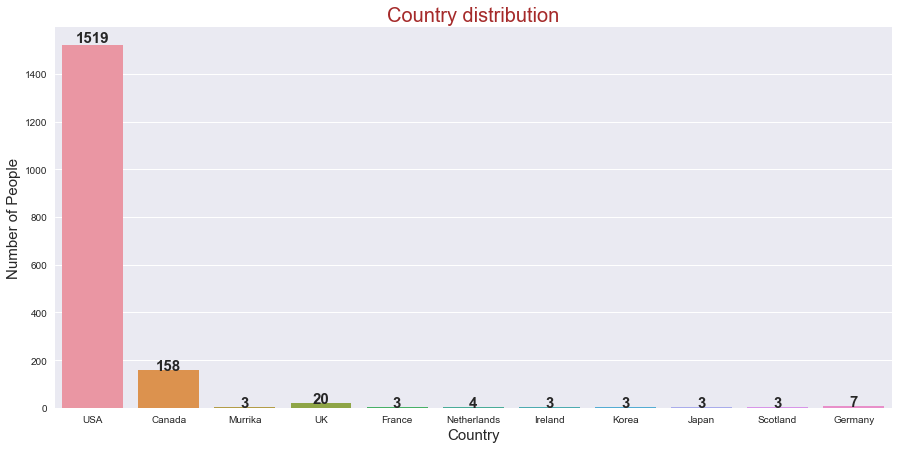

In [15]:
to_select = candy['Q4_country'].value_counts()[candy['Q4_country'].value_counts() > 2].index
candy_temp = candy[candy['Q4_country'].isin(to_select)]

plt.figure(figsize=(15, 7))
CountPlot(data=candy_temp, x='Q4_country')

> As we can see most of the people who did this survey are from the USA.

For Q6 i will try to answer these two questions:
- What is the top ten candies that give people joy?
- What is the top ten candies that give people despair?

In [35]:
(Q6.values == 'JOY').sum(axis=0).shape

(103,)

In [51]:
q6_cols = [col for col in candy.columns if 'Q6' in col]
Q6 = candy.loc[:, q6_cols].copy()
Joy_values = (Q6.values == 'JOY').sum(axis=0)
Despair_values = (Q6.values == 'DESPAIR').sum(axis=0)
Q6 = pd.DataFrame(data={'Candy_name':Q6.columns.str.replace('Q6_', '').str.capitalize(), 
                        'JOY':Joy_values, 'DESPAIR':Despair_values})

In [52]:
Q6.head()

,Candy_name,JOY,DESPAIR
0,100_grand_bar,849,81
1,Anonymous_brown_globs_that_come_in_black_and_orange_wrappers_(a.k.a._mary_janes),172,1048
2,Any_full-sized_candy_bar,1508,16
3,Black_jacks,86,766
4,Bonkers_(the_candy),112,478


In [53]:
Q6.shape

(103, 3)

### Q1:What is the top five candies that give people joy?

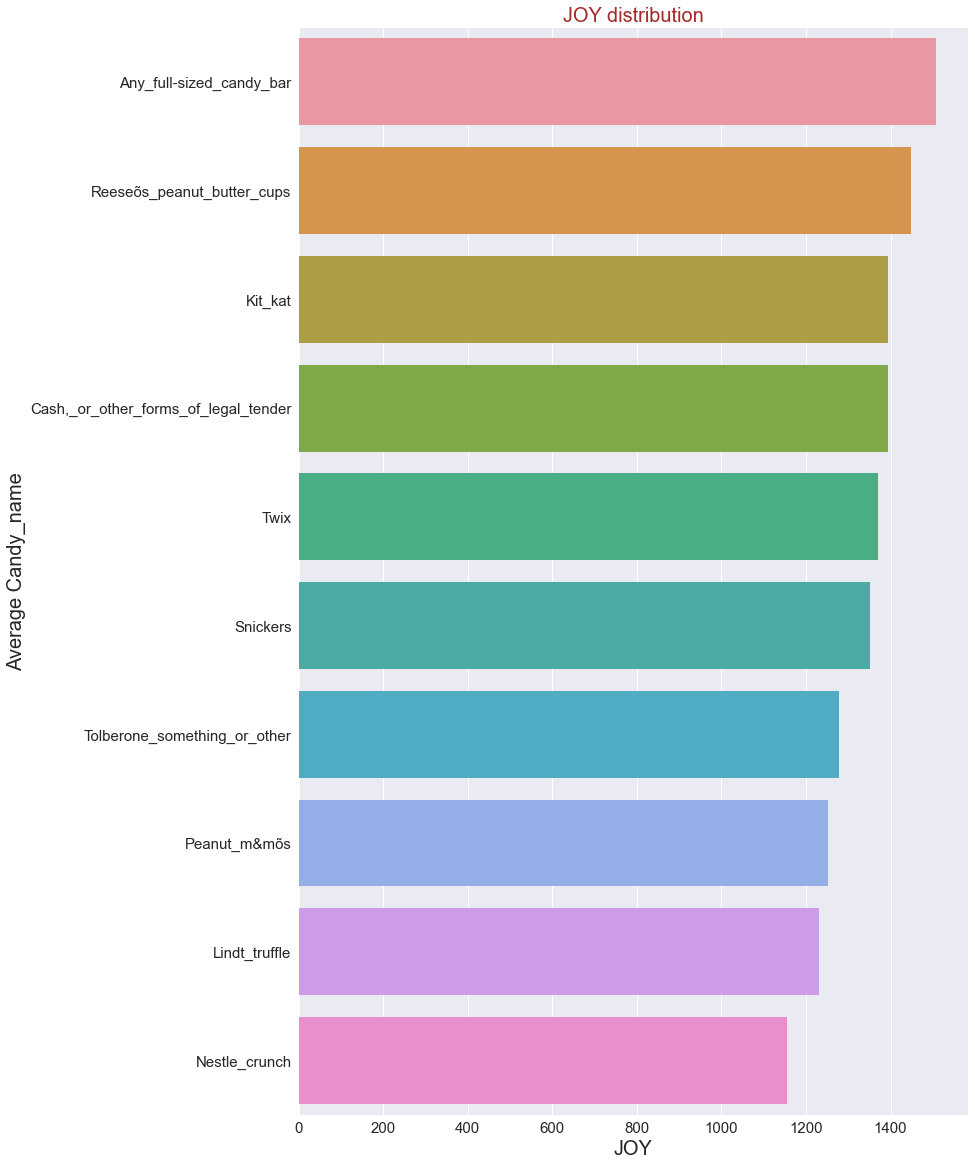

In [69]:
top_JOY = Q6.sort_values(by='JOY', ascending=False).head(10)   # Top ten

plt.figure(figsize=(12, 20))
BarPlot(top_JOY, 'JOY', 'Candy_name')

### Q1:What is the top five candies that give people despair?

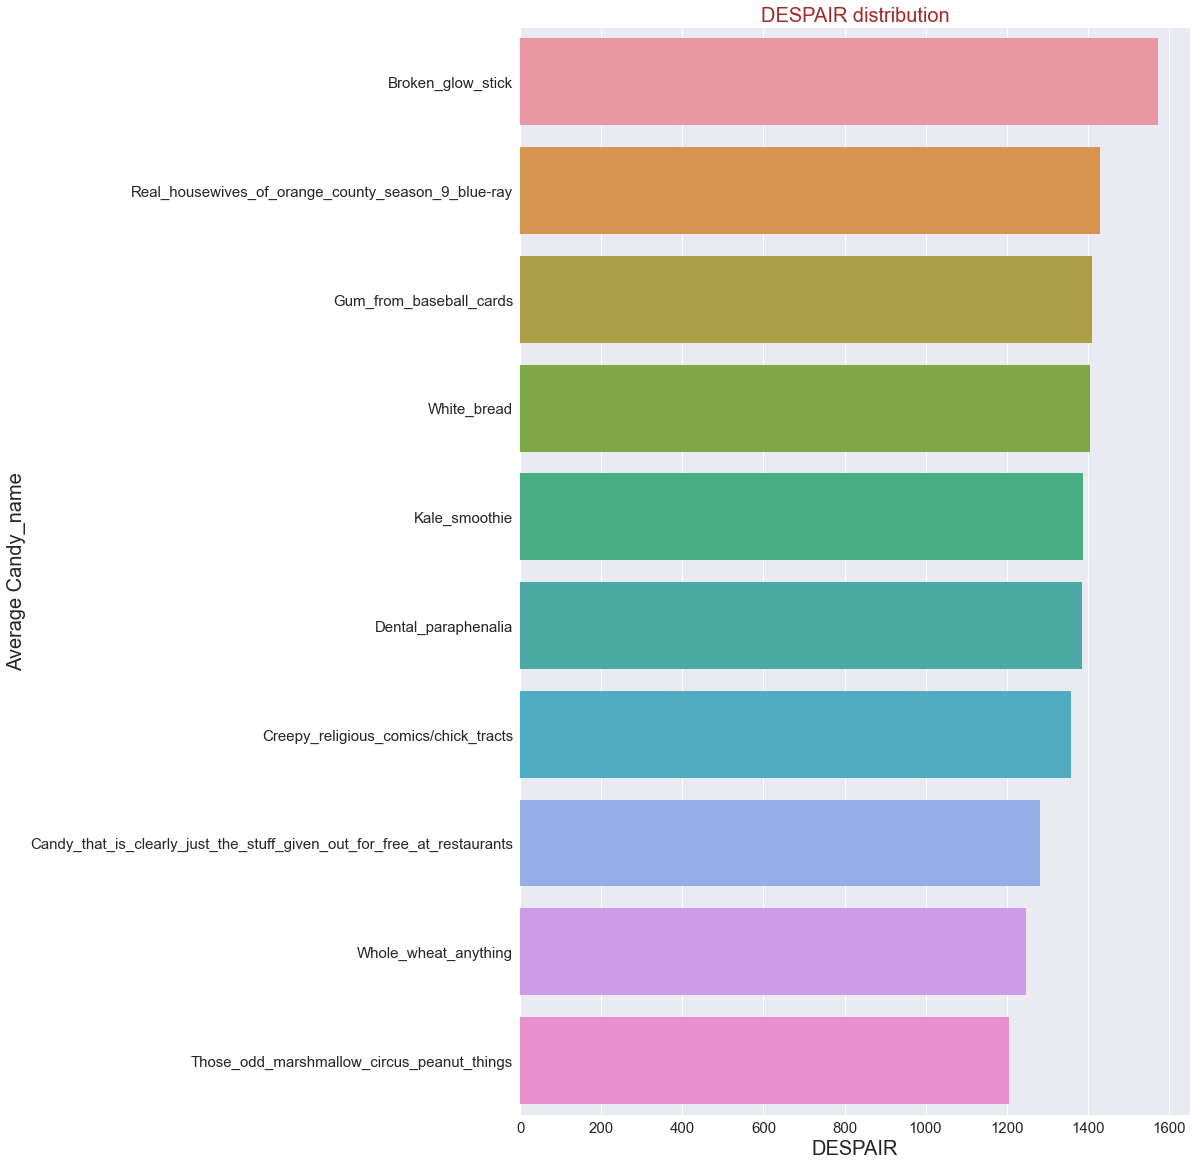

In [71]:
top_DESPAIR = Q6.sort_values(by='DESPAIR', ascending=False).head(10)   # Top ten

plt.figure(figsize=(12, 20))
BarPlot(top_DESPAIR, 'DESPAIR', 'Candy_name')

<font color='blue'>
<h1><center> Bivariate EDA </center></h1>

Here I wanna Answer these Questions:
- What is the top ten candy for Women?
- What is the top ten candy for men?
- can gender affect how a person sees the dress?
- can Age affect hoe a person sees the dress ?

In [73]:
candy['Q2_gender'].unique()

array(['Male', 'Female', "I'd rather not say", 'Other'], dtype=object)

In [75]:
q6_cols = [col for col in candy.columns if 'Q6' in col]
Q6 = candy.loc[:, ['Q2_gender']+q6_cols].copy()

# Men
Men_Q6 = Q6[Q6['Q2_gender']=='Male']
Men_Joy_values = (Men_Q6.values == 'JOY').sum(axis=0)
Men_Despair_values = (Men_Q6.values == 'DESPAIR').sum(axis=0)
Men_Q6 = pd.DataFrame(data={'Candy_name':Men_Q6.columns.str.replace('Q6_', '').str.capitalize(), 
                        'JOY':Men_Joy_values, 'DESPAIR':Men_Despair_values})

# Women
Women_Q6 = Q6[Q6['Q2_gender']=='Female']
Women_Joy_values = (Women_Q6.values == 'JOY').sum(axis=0)
Women_Despair_values = (Women_Q6.values == 'DESPAIR').sum(axis=0)
Women_Q6 = pd.DataFrame(data={'Candy_name':Women_Q6.columns.str.replace('Q6_', '').str.capitalize(), 
                        'JOY':Women_Joy_values, 'DESPAIR':Women_Despair_values})

### What is the top ten candy for Women?

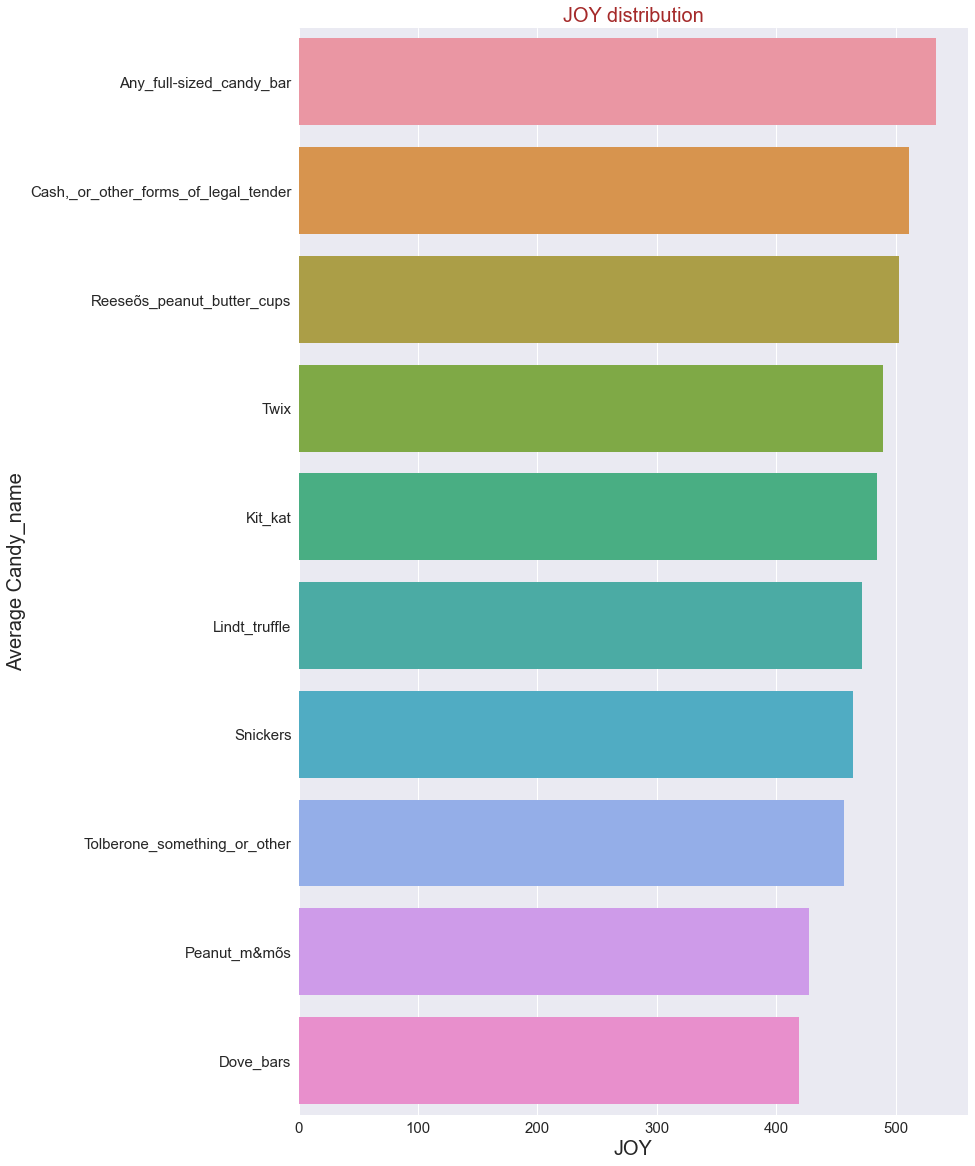

In [76]:
top_JOY = Women_Q6.sort_values(by='JOY', ascending=False).head(10)   # Top ten

plt.figure(figsize=(12, 20))
BarPlot(top_JOY, 'JOY', 'Candy_name')

### What is the top ten candy for men?

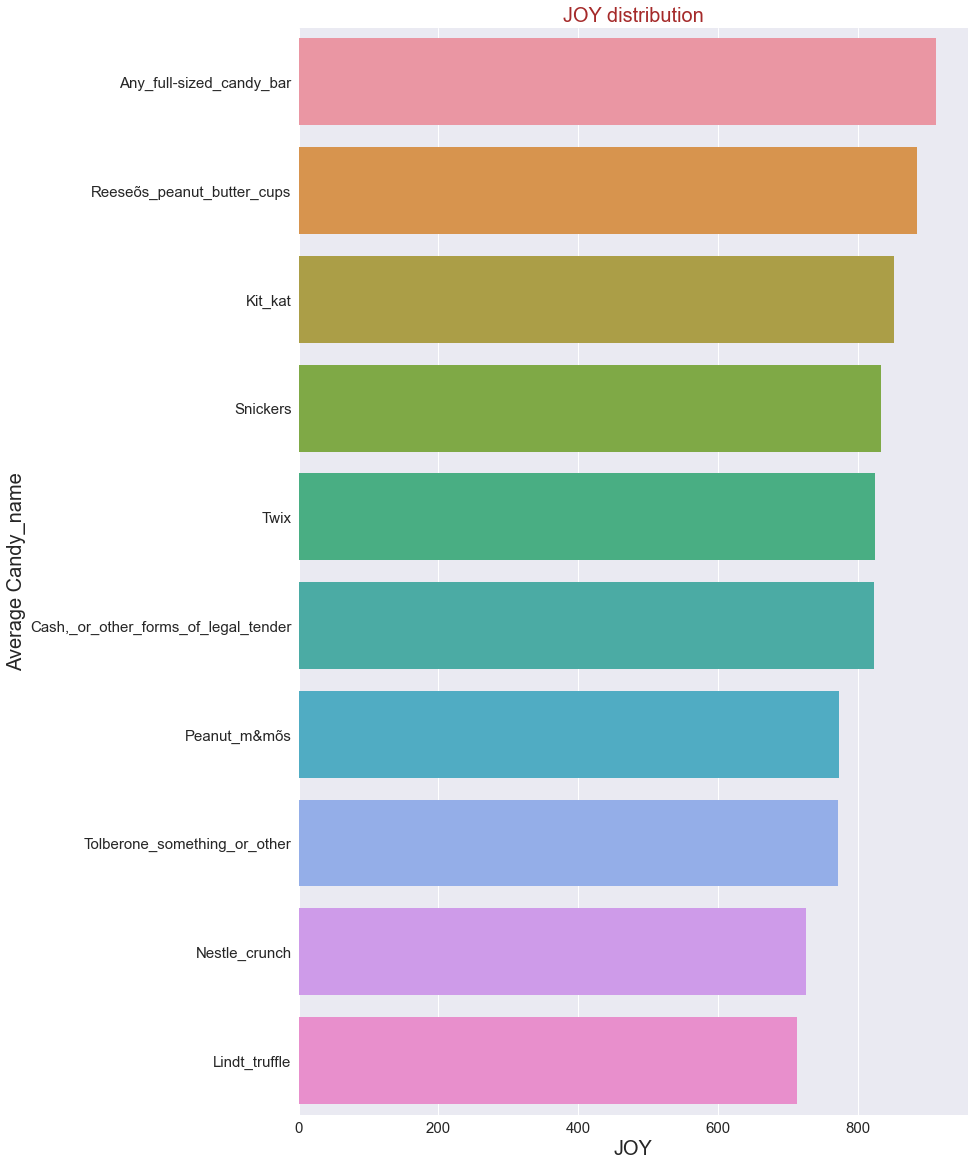

In [77]:
top_JOY = Men_Q6.sort_values(by='JOY', ascending=False).head(10)   # Top ten

plt.figure(figsize=(12, 20))
BarPlot(top_JOY, 'JOY', 'Candy_name')

### Can gender affect how a person sees the dress?

In [78]:
candy.columns

Index(['Internal_ID', 'Q1_going_out?', 'Q2_gender', 'Q3_age', 'Q4_country',
       'Q6_100_grand_bar',
       'Q6_anonymous_brown_globs_that_come_in_black_and_orange_wrappers_(a.k.a._mary_janes)',
       'Q6_any_full-sized_candy_bar', 'Q6_black_jacks',
       'Q6_bonkers_(the_candy)',
       ...
       'Q6_twix',
       'Q6_vials_of_pure_high_fructose_corn_syrup,_for_main-lining_into_your_vein',
       'Q6_vicodin', 'Q6_whatchamacallit_bars', 'Q6_white_bread',
       'Q6_whole_wheat_anything', 'Q6_york_peppermint_patties', 'Q10_dress',
       'Q11_day', 'Q12_media'],
      dtype='object', length=111)

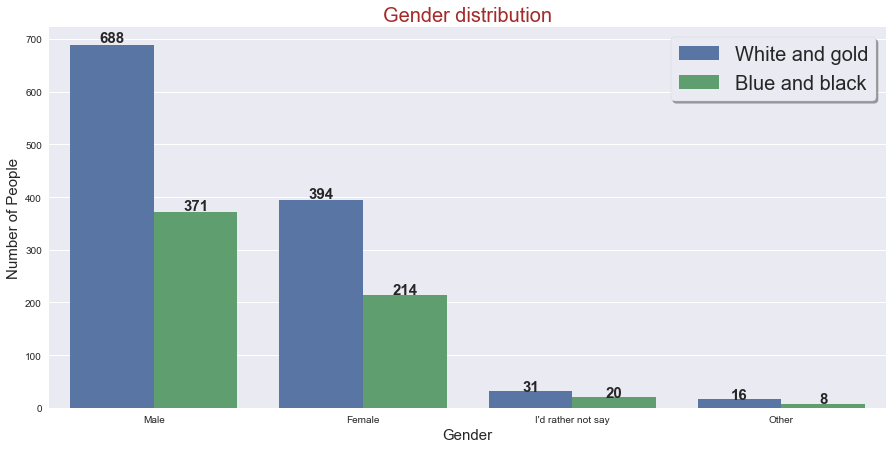

In [83]:
plt.figure(figsize=(15, 7))
CountPlot(candy, 'Q2_gender', hue='Q10_dress')

> As we can see gender doesn't affect how the dress is seen

### Can Age affect hoe a person sees the dress ?

In [84]:
candy.columns

Index(['Internal_ID', 'Q1_going_out?', 'Q2_gender', 'Q3_age', 'Q4_country',
       'Q6_100_grand_bar',
       'Q6_anonymous_brown_globs_that_come_in_black_and_orange_wrappers_(a.k.a._mary_janes)',
       'Q6_any_full-sized_candy_bar', 'Q6_black_jacks',
       'Q6_bonkers_(the_candy)',
       ...
       'Q6_twix',
       'Q6_vials_of_pure_high_fructose_corn_syrup,_for_main-lining_into_your_vein',
       'Q6_vicodin', 'Q6_whatchamacallit_bars', 'Q6_white_bread',
       'Q6_whole_wheat_anything', 'Q6_york_peppermint_patties', 'Q10_dress',
       'Q11_day', 'Q12_media'],
      dtype='object', length=111)

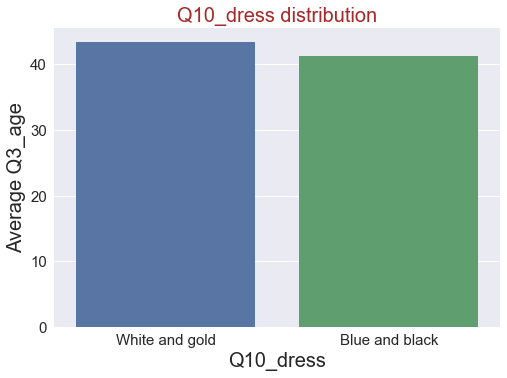

In [88]:
BarPlot(candy, 'Q10_dress', 'Q3_age')

> Also the Average Age is very close, so the age doesn't affect anything too.

<font color='blue'>
<h1><center> Multivariate EDA </center></h1>

Here I wanna Answer these Questions:
- Does the Gender and Age affect how the dress looks like?
- Or Affects if the persons prefers to go out or not?
- Or even affects what day is favourite?
- Or the website they like?

### Does the Gender and Age affect how the dress looks like?

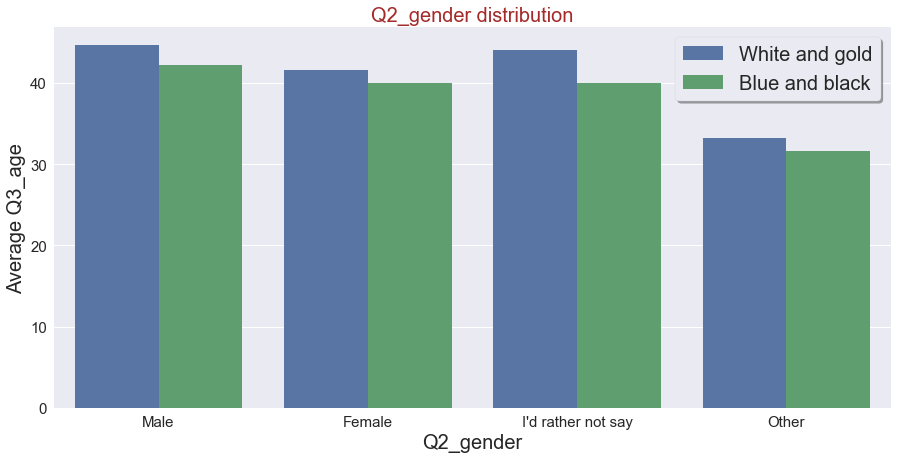

In [93]:
plt.figure(figsize=(15, 7))
BarPlot(candy, x='Q2_gender', y='Q3_age', hue='Q10_dress')

> Nothing !

### Or Affects if the persons prefers to go out or not?

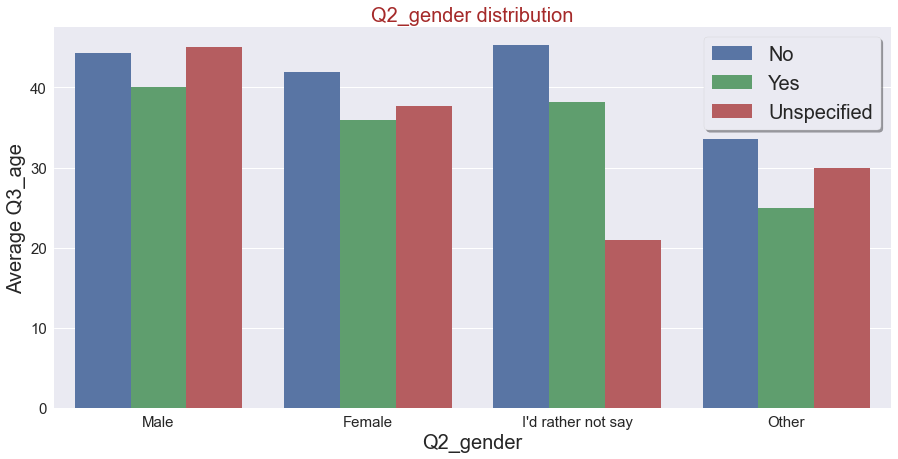

In [94]:
plt.figure(figsize=(15, 7))
BarPlot(candy, x='Q2_gender', y='Q3_age', hue='Q1_going_out?')

> The Average age of the people who wanted to go out are higher than that of those who didn't for both males and females.

### Or even affects what day is favourite?

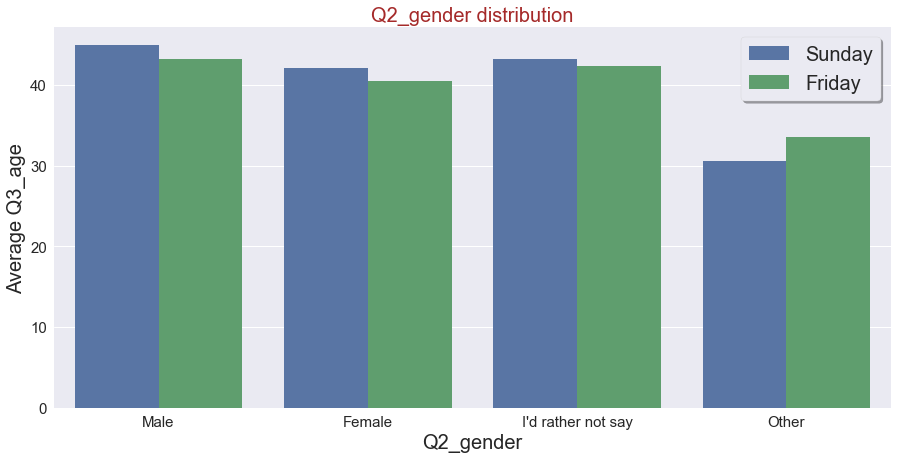

In [95]:
plt.figure(figsize=(15, 7))
BarPlot(candy, x='Q2_gender', y='Q3_age', hue='Q11_day')

> No, Nothing. But we can't ignore the fact that people who chose "Other" and Prefers Friday have higher average age than that of those who chose "Other" and prefers Sunday.

### Or the website they like?

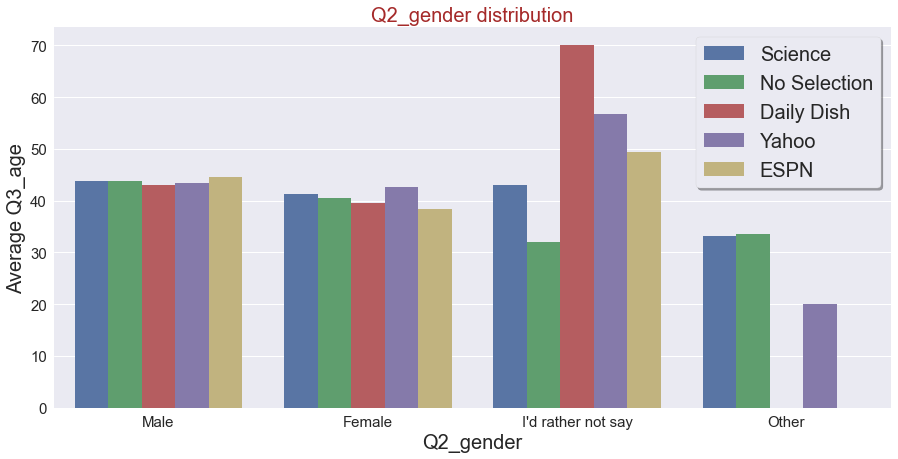

In [96]:
plt.figure(figsize=(15, 7))
BarPlot(candy, x='Q2_gender', y='Q3_age', hue='Q12_media')

> We cand see too three observations:
- people who have selected their gender their age doesn't affect the website they prefer.
- People who didn't say their gender age may affects their favourite website ( but don't forget than there was an outlier but unfortunately there is no time to dig deeper in the analsis )
- people who have selected "Other" didn't select "Daily Dish"